In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import json
import math
import PIL
from PIL import ImageOps
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import cv2 as cv
import random
import os
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [ ]:
from keras import optimizers, applications
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras import backend as K
from sklearn.preprocessing import LabelEncoder

from tqdm.auto import tqdm
tqdm.pandas()

In [ ]:
DIRECTORY = '/content/drive/MyDrive/dataset'
# a raw string(r'...') is used to treat backslash(\) as a normal character
CATEGORIES = ['mammooty','mohanlal']
num_classes = len(CATEGORIES)

In [ ]:
IMG_SIZE = 224

data = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        label = CATEGORIES.index(category)
        #print(label)
        img_arr = cv.imread(img_path)
        img_arr = cv.resize(img_arr,(IMG_SIZE,IMG_SIZE))
        #print(img_arr)
        data.append([img_arr,label])
#         labelling the data

In [ ]:
random.shuffle(data)
#shuffle data

In [ ]:
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)

In [ ]:
X = np.array(X)
y = np.array(y)
# changed X & y into arrays and stored it in respective variables

In [ ]:
X = X/255

In [ ]:
IMAGE_SIZE = [224, 224]
resnet = ResNet50(input_shape = (224,224,3), weights = 'imagenet', include_top = False)

# this will exclude the initial layers from training phase as there are already been trained.
for layer in resnet.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(resnet.output)
x = Dense(128, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time.
x = Dense(1, activation = 'softmax')(x)  # adding the output layer with softmax function as this is a multi label classification problem.

modelr = Model(inputs = resnet.input, outputs = x)

modelr.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
modelr.fit(X,y, epochs=5, validation_split=0.2)

Epoch 1/5
26/26 [==============================] - 18s 216ms/step - loss: 0.6310 - accuracy: 0.7011 - val_loss: 0.5912 - val_accuracy: 0.7164
Epoch 2/5
26/26 [==============================] - 3s 118ms/step - loss: 0.6059 - accuracy: 0.7011 - val_loss: 0.5848 - val_accuracy: 0.7164
Epoch 3/5
26/26 [==============================] - 4s 157ms/step - loss: 0.6001 - accuracy: 0.7011 - val_loss: 0.6040 - val_accuracy: 0.7164
Epoch 4/5
26/26 [==============================] - 4s 156ms/step - loss: 0.6041 - accuracy: 0.7011 - val_loss: 0.5740 - val_accuracy: 0.7164
Epoch 5/5
26/26 [==============================] - 4s 155ms/step - loss: 0.6096 - accuracy: 0.7011 - val_loss: 0.5747 - val_accuracy: 0.7164


In [ ]:
modelr.save('resnet.model',save_format='h5')

In [ ]:
import keras
modelr = keras.models.load_model("/content/drive/MyDrive/resnet.model")

In [ ]:
import cv2
CATEGORIES = ['mammooty', 'mohanlal']
def image(path):
    image = cv2.imread(path)
    #plt.imshow(image)
    resize_img = image[0:200,10:200]
    new_arr = cv2.resize(resize_img, (224, 224))
    plt.imshow(new_arr)
    #print(new_arr)
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1,224,224,3)
    #print(new_arr)
    return new_arr

#preprocessing the user input

1/1 [==============================] - 0s 25ms/step
mamooty
[[1.]]


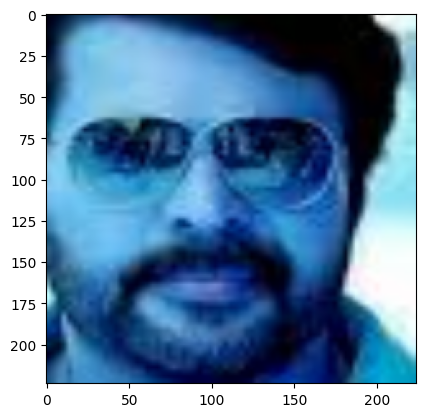

In [ ]:
#path = '/content/drive/MyDrive/dataset/mammooty/mammooty104.png'
result = modelr.predict([image('/content/drive/MyDrive/dataset/mammooty/mammooty104.png')])
if result[0][0] == 1:
    prediction = 'mamooty'
elif result[0][0] == 0:
    prediction = 'mohanlal'
else:
    prediction = 'I dont know this guy!'
print(prediction)
print(result)
#print(path)

In [ ]:
scores = modelr.evaluate(X,y,verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
#to know accuracy of model

Accuracy: 70.42%
